In [14]:
import json
import detect_face_api

# -----------------
# Specify image path, model configuration, and model weights path
# -----------------
img_path = "./data/widerface/val/images/1--Handshaking/1_Handshaking_Handshaking_1_35.jpg"
model_weights_path = './weights/Resnet50_Final.pth'
output_img_path = "./test_outputs/final_test2.jpg"

# -----------------
# Load the parameters for model from the JSON file (test_config.json, note that this is different from cfg as cfg is for the model architecture,
# but the json file specifies non-model related configurations like whether to save the image after running the model on the image etc
# -----------------
json_config_file_path = "./test_config.json"
with open(json_config_file_path, 'r') as file:
    test_config_json = json.load(file)
print(test_config_json)

dets = detect_face_api.detect_face(img_path, model_weights_path, output_img_path, test_config_json)

{'cfg': 'cfg_re50', 'resize': 1, 'confidence_threshold': 0.02, 'top_k': 5000, 'keep_top_k': 750, 'nms_threshold': 0.4, 'save_image': True, 'vis_thres': 0.6}
Loading pretrained model from ./weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
net forward time: 0.0149


In [16]:
print(dets.shape)
print(dets)

(2, 15)
[[419.27563    110.65089    627.5438     392.0258       0.99986887
  443.45044    228.14613    521.67145    221.49951    458.3042
  278.07254    457.13565    316.33047    536.6686     310.0857    ]
 [ -2.0359     -34.12319    116.79817    192.90962      0.7635824
   73.54874     12.159671    89.20892     16.371689    88.42756
   75.62047     49.35048    122.86168     56.165863   128.14525   ]]


0.99986887
0.7635824


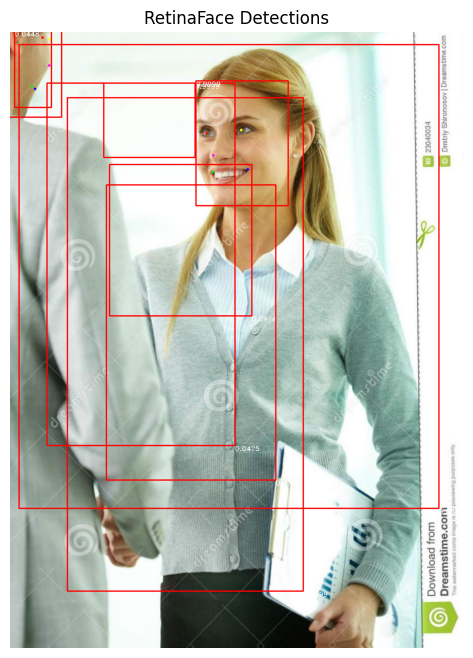

True

In [21]:
for b in dets:
    print(b[4])
    if b[4] < 0.9:
        continue
    text = "{:.4f}".format(b[4])
    b = list(map(int, b))
    cv2.rectangle(img_raw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
    cx = b[0]
    cy = b[1] + 12
    cv2.putText(img_raw, text, (cx, cy),
                cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))

    # landms
    cv2.circle(img_raw, (b[5], b[6]), 1, (0, 0, 255), 4)
    cv2.circle(img_raw, (b[7], b[8]), 1, (0, 255, 255), 4)
    cv2.circle(img_raw, (b[9], b[10]), 1, (255, 0, 255), 4)
    cv2.circle(img_raw, (b[11], b[12]), 1, (0, 255, 0), 4)
    cv2.circle(img_raw, (b[13], b[14]), 1, (255, 0, 0), 4)

# Convert BGR to RGB for matplotlib display
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("RetinaFace Detections")
plt.show()
# save image
cv2.imwrite(output_img_path, img_raw)